In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import gensim
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Embedding

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [18]:
X_train= np.load('feature_extraction/X_train_d.npy', allow_pickle=True)
X_test = np.load('feature_extraction/X_test_d.npy', allow_pickle=True)

y_train = np.load('feature_extraction/y_train_d.npy', allow_pickle=True)
y_test = np.load('feature_extraction/y_test_d.npy', allow_pickle=True)

embedding_matrix = np.load('feature_extraction/embedding_vectors_w2v.npy', allow_pickle=True)
embedding_vectors = np.load('feature_extraction/embedding_matrix_gv.npy', allow_pickle=True)
vocab_size=16380
DIM=100
maxlen=100

In [20]:
# Define the model
model = Sequential([
    Embedding(vocab_size, output_dim=DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['acc'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10)

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1638000   
                                                                 
 dropout_7 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_4 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,788,529
Trainable params: 150,529
Non-

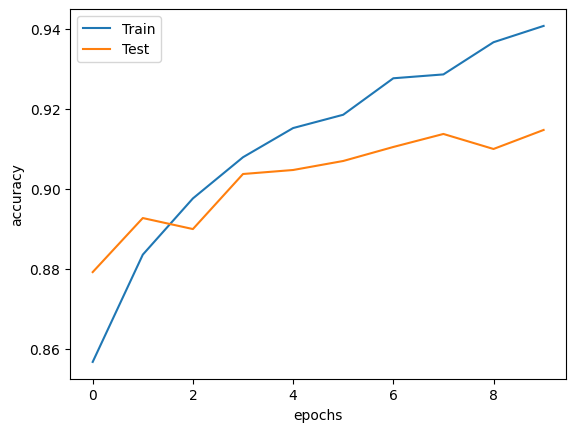

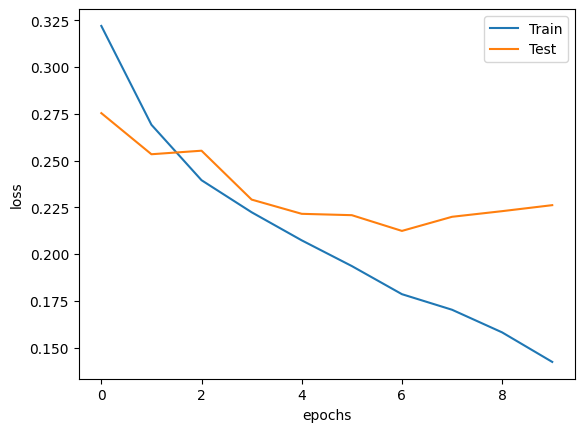

In [36]:
# visualize the results
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [40]:
# Define the model
model = Sequential([
    Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['acc'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10)
# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1638000   
                                                                 
 dropout_13 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               33024     
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,788,529
Trainable params: 150,529
Non-

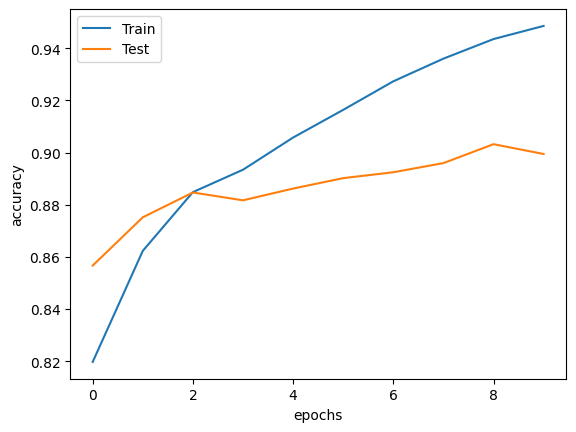

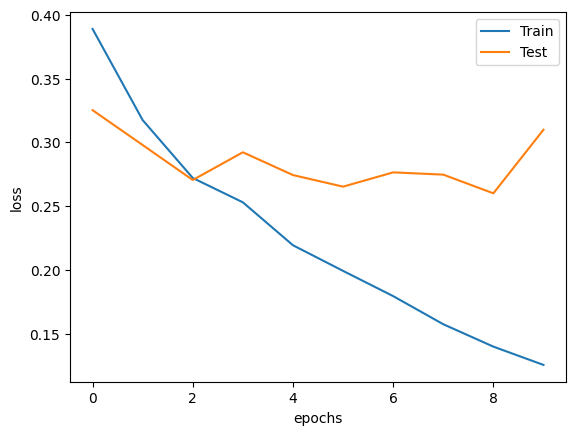

In [41]:
# visualize the results
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()